<a href="https://colab.research.google.com/github/wingmoe21/tech_innovators/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

In [2]:
!pip install pytesseract io pdf2image opencv-python

ERROR: Could not find a version that satisfies the requirement io (from versions: none)
ERROR: No matching distribution found for io


In [3]:
!pip install scikit-image


In [4]:
!pip install PyMuPDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 41.6 MB/s eta 0:00:00


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import cv2
from PIL import Image
import numpy as np
from skimage.metrics import structural_similarity as ssim
import io
import multiprocessing

# Path to the video file
video_path = '/content/drive/MyDrive/Lectures/Next Greater Element _ GeeksforGeeks.mp4'

# Initialize the video capture object
cap = cv2.VideoCapture(video_path)

# Initialize a list to hold the unique slides
unique_slides = []

# Previous frame for comparison
prev_frame = None

# Tolerance to decide whether two images are similar
similarity_threshold = 0.95

def are_frames_similar(frame_pair):
    frame1, frame2 = frame_pair
    # Calculate the structural similarity index (SSI) between two frames
    # You can use skimage's structural_similarity function for this
    # from skimage.metrics import structural_similarity as compare_ssim
    # Return True if they are similar above the given threshold
    ssi_index, _ = ssim(frame1, frame2, full=True)
    return ssi_index > similarity_threshold

# Read frames from the video
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale for comparison
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Add the frame to the list
    frames.append(gray_frame)

# Release the video capture object
cap.release()

# Compare frames in parallel
with multiprocessing.Pool() as pool:
    frame_pairs = zip(frames[:-1], frames[1:])
    similar_frames = pool.map(are_frames_similar, frame_pairs)

# Process the results
for i, is_similar in enumerate(similar_frames):
    if not is_similar:
        slide_image = Image.fromarray(frames[i + 1])
        unique_slides.append(slide_image)

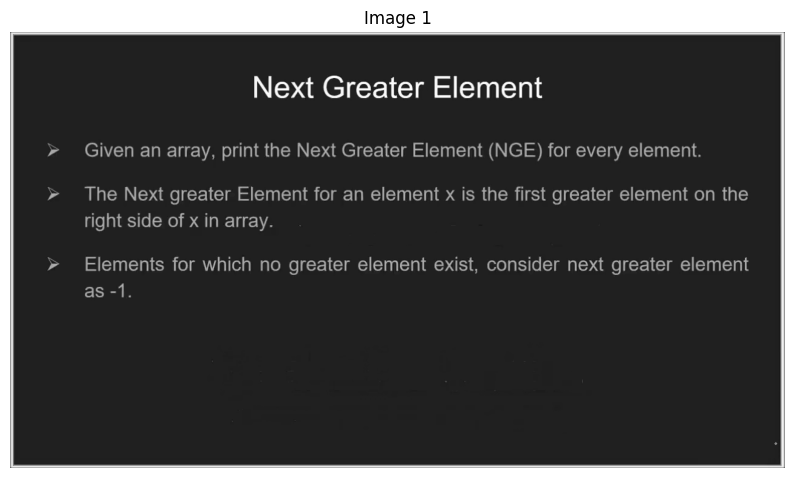

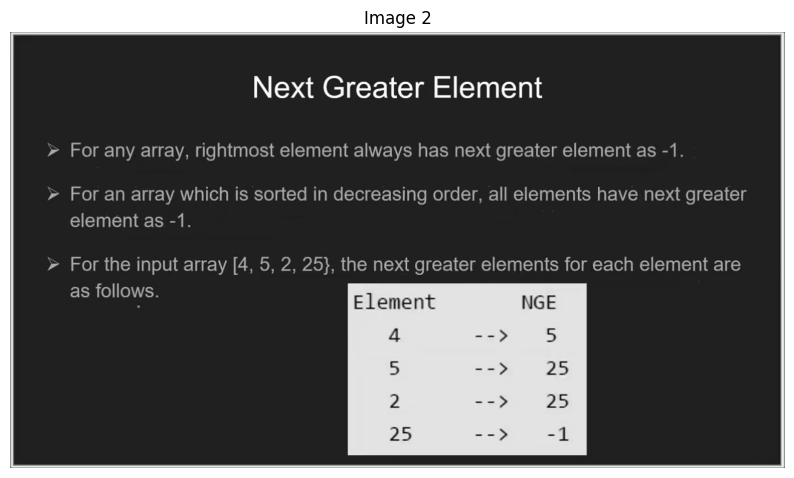

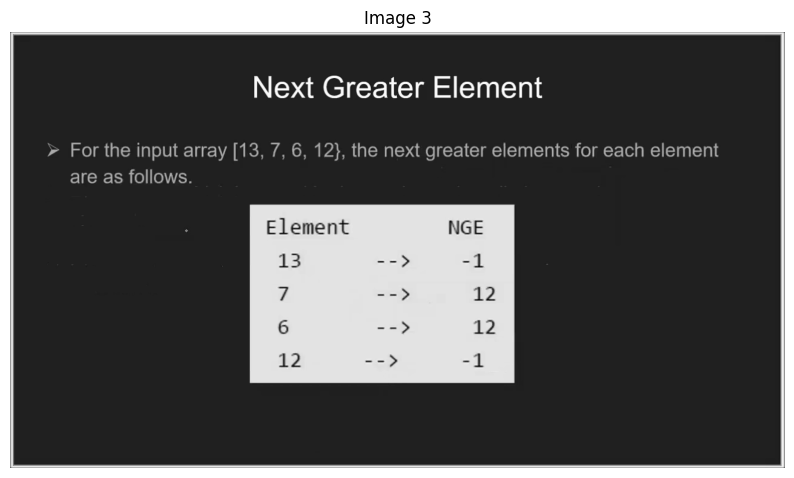

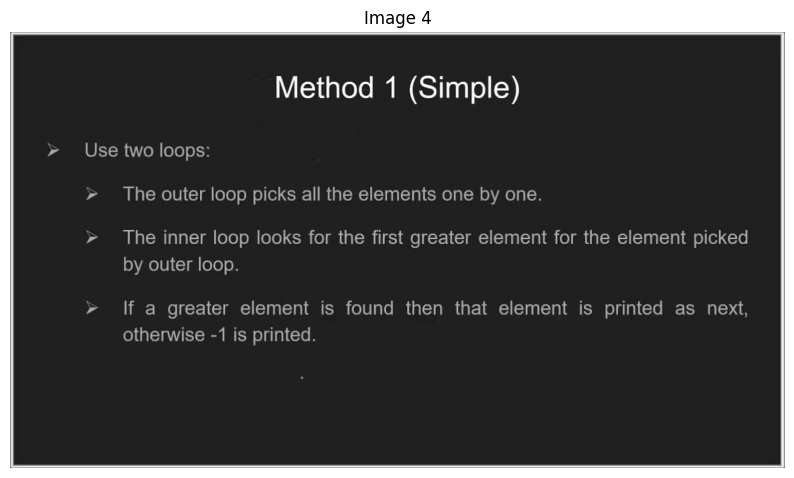

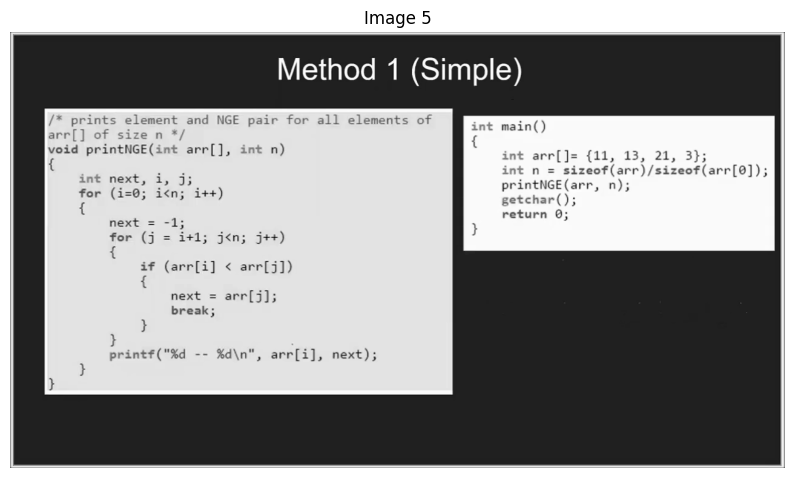

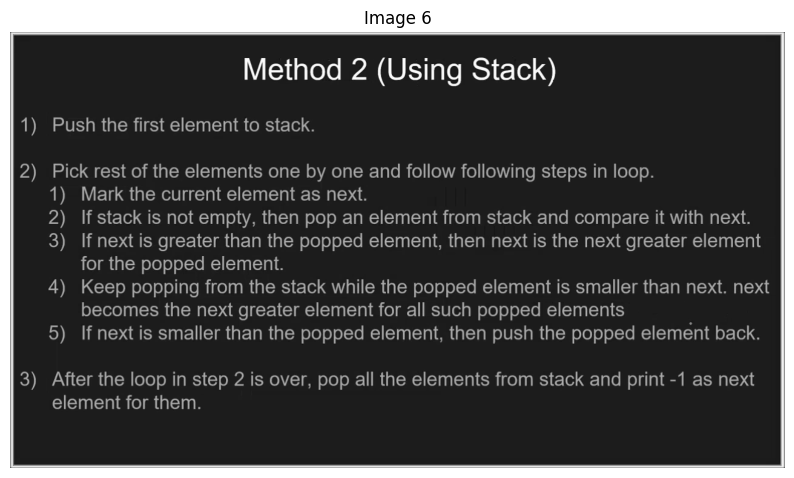

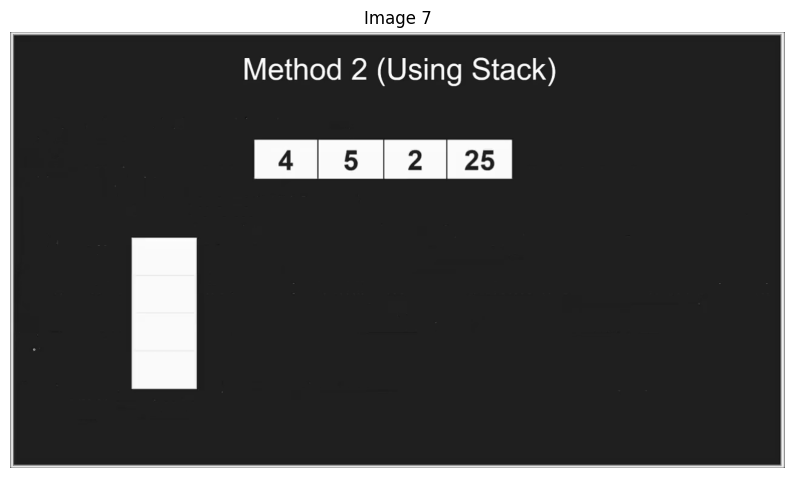

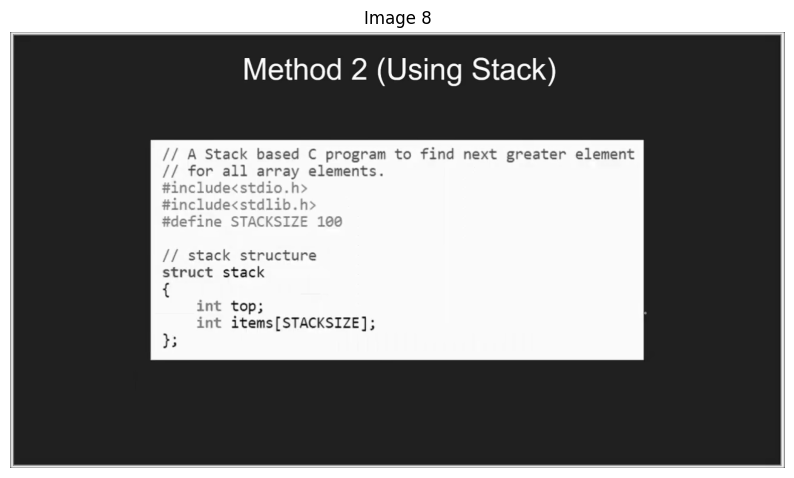

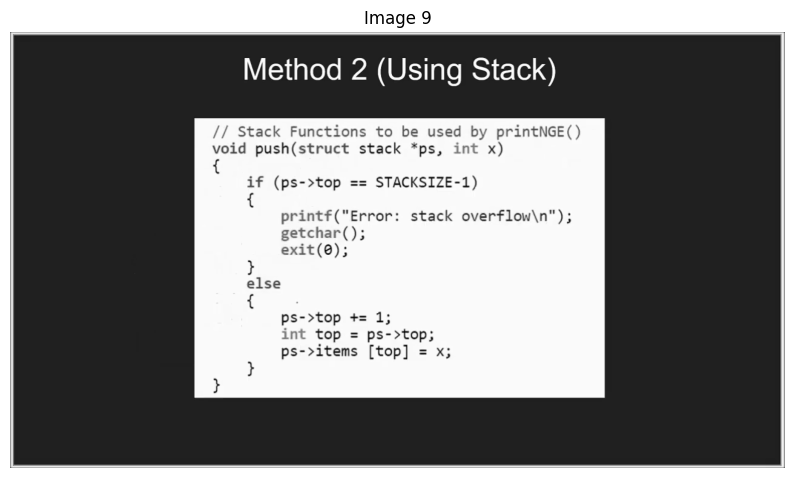

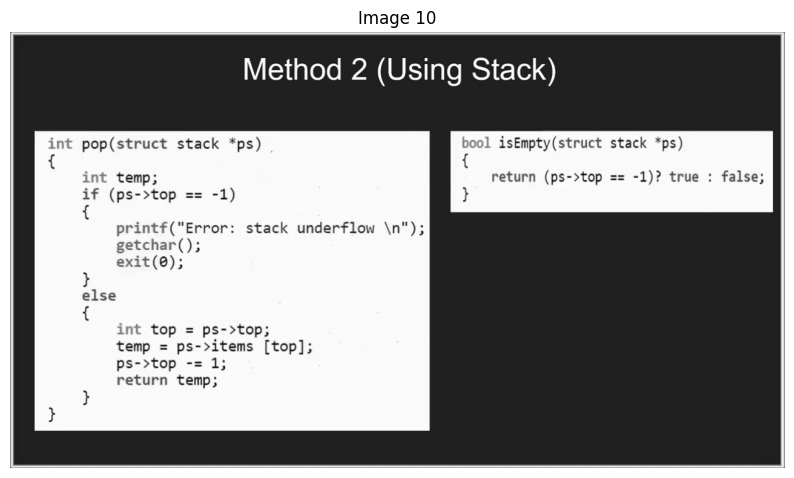

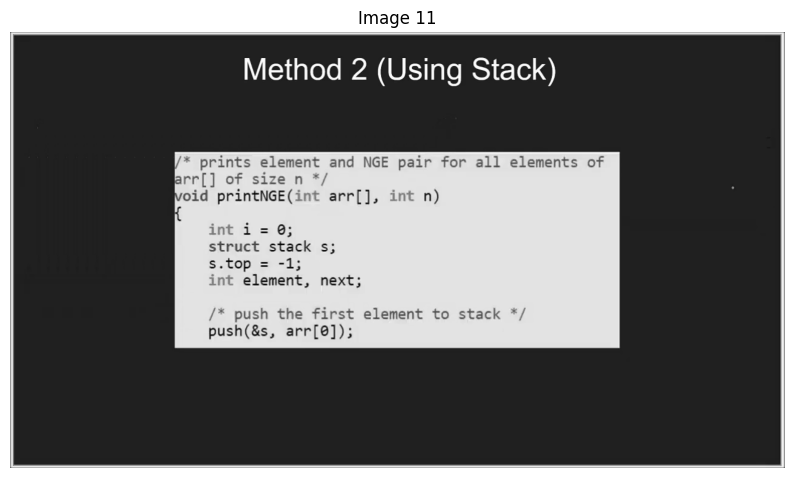

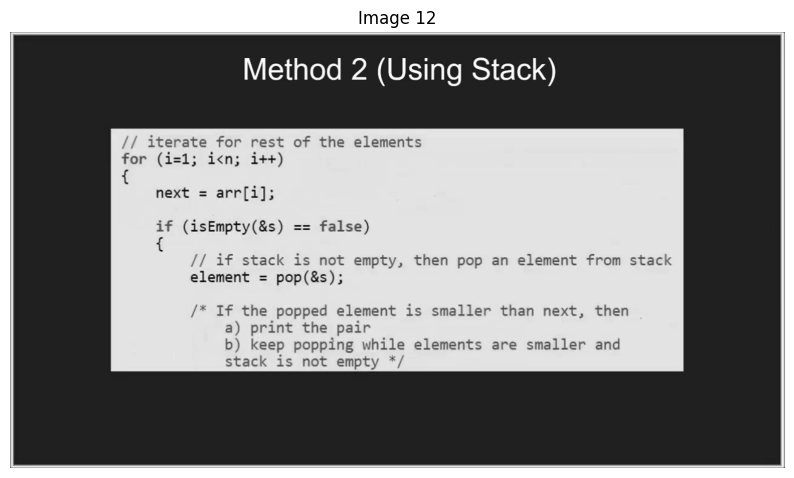

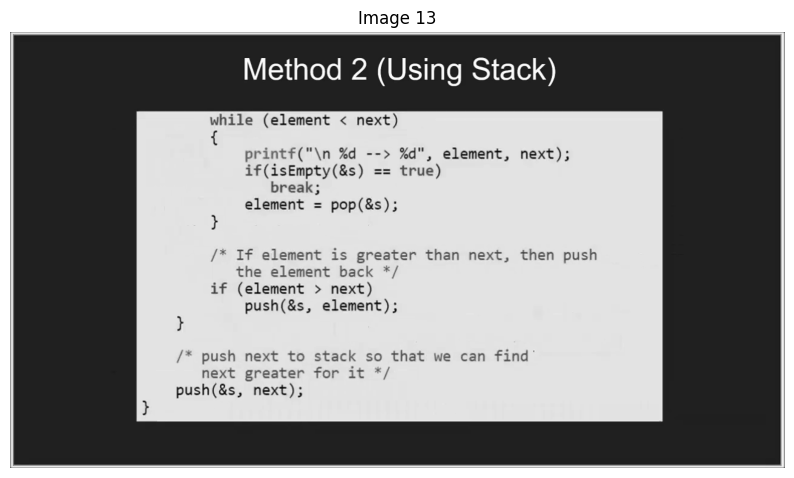

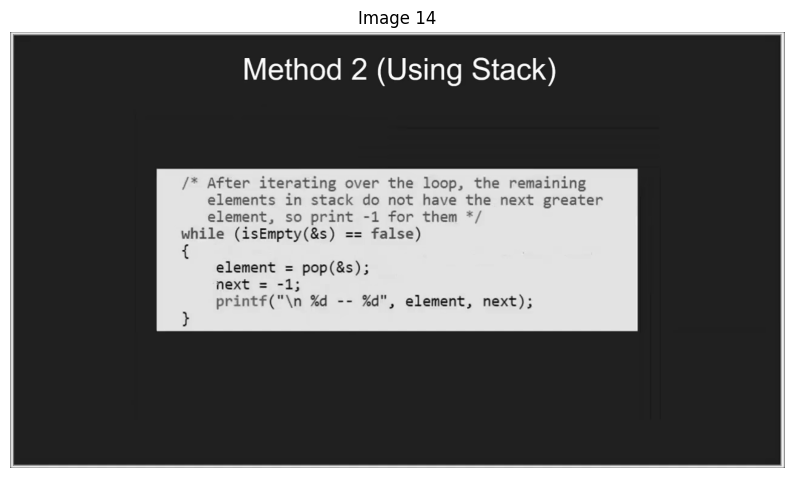

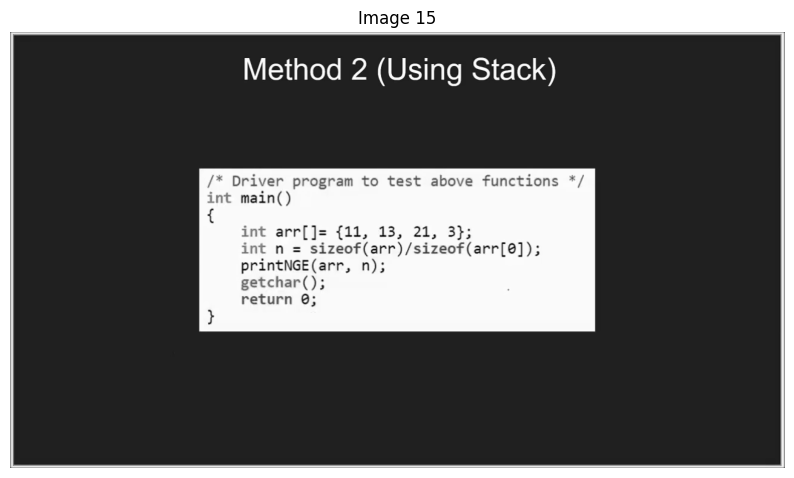

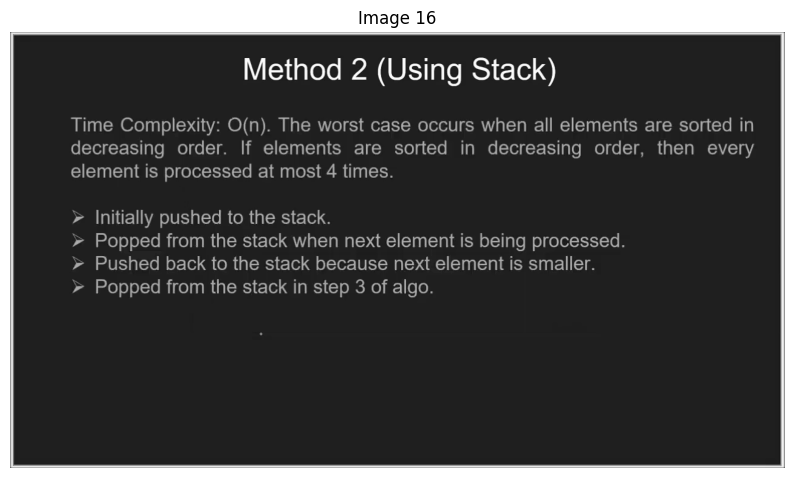

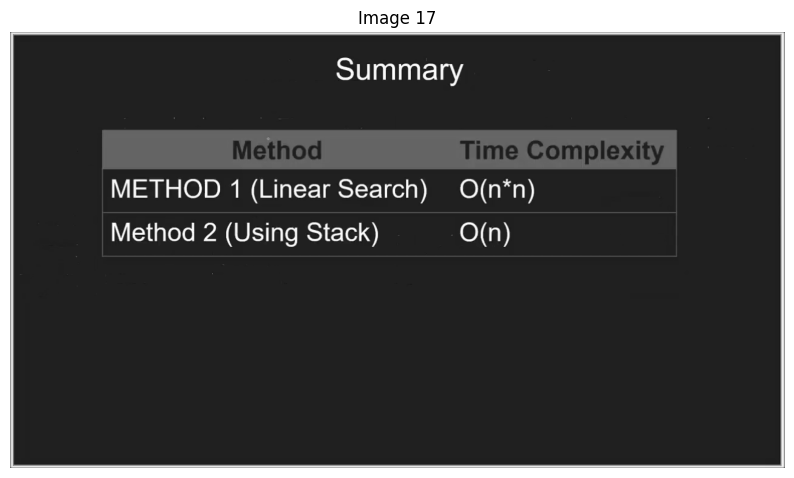

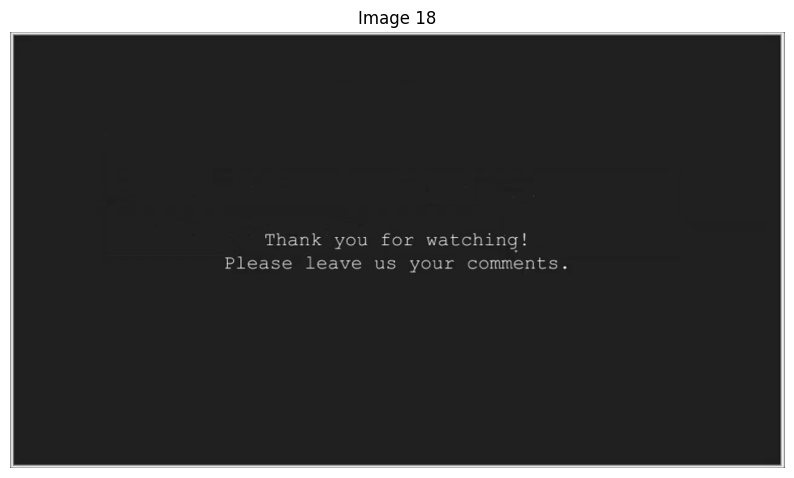

In [2]:
import matplotlib.pyplot as plt

# Assuming unique_slides is your list of PIL.Image.Image objects
for i, image in enumerate(unique_slides):
    plt.figure(figsize=(10, 6))  # Adjust the size as needed
    plt.imshow(image, cmap='gray')  # Display the image
    plt.title(f"Image {i+1}")  # Give each image a title
    plt.axis('off')  # Turn off axis numbers and labels
    plt.show()  # Display the current image


In [3]:
import io
import fitz
# Create a PDF document
pdf_path = 'extracted_slides.pdf'
pdf_doc = fitz.open()

# Add slides to the PDF
for slide in unique_slides:
    img_byte_arr = io.BytesIO()
    slide.save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()
    img = fitz.open("png", img_byte_arr)
    rect = img[0].rect
    pdfbytes = img.convert_to_pdf()
    img.close()
    imgPDF = fitz.open("pdf", pdfbytes)
    page = pdf_doc.new_page(width = rect.width, height = rect.height)
    page.show_pdf_page(rect, imgPDF, 0)

# Save the PDF document
pdf_doc.save(pdf_path)
pdf_doc.close()

print(f"PDF with extracted slides created at: {pdf_path}")


PDF with extracted slides created at: extracted_slides.pdf
